<a href="https://colab.research.google.com/github/hosseinnasi/Environmental-Classification_ML/blob/main/3_classes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
from scipy.stats import mode
from matplotlib.ticker import MaxNLocator

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
df_ii = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/ii5.csv')
df_ii=df_ii.iloc[:, 5:]

#del df_ii['ver_acc']
df_ii = df_ii.drop(columns=[col for col in df_ii.columns if "6" in col])
df_ii = df_ii.drop(columns=[col for col in df_ii.columns if "nr" in col])
#idx=[1,2,7,38]
#df_ii=df_ii.iloc[:,idx]
[a,b]=df_ii.shape
print(b)
df_ii.insert(b, "classes", np.ones(a), True)


40


In [ ]:
df_inw = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/inw5.csv')
df_inw=df_inw.iloc[: ,5:]
#del df_inw['ver_acc']
df_inw = df_inw.drop(columns=[col for col in df_inw.columns if "6" in col])
df_inw = df_inw.drop(columns=[col for col in df_inw.columns if "nr" in col])
idx=[1,2,7,38]
df_inw=df_inw.iloc[:,idx]

[a,b]=df_inw.shape

df_inw.insert(b, "classes",2*np.ones(a), True)


In [ ]:
df_inw

,hor_acc,ver_acc,num_of_wifi_5,max_of_wifi_5,classes
0,9.988000,5.106248,3,-77,2.0
1,10.255000,4.401061,11,-58,2.0
2,10.255000,4.401061,10,-61,2.0
3,10.255000,4.401061,11,-60,2.0
4,10.255000,4.401061,10,-60,2.0
...,...,...,...,...,...
20968,14.774000,1.004858,51,-51,2.0
20969,15.094000,0.855869,57,-50,2.0
20970,15.154000,0.853507,61,-50,2.0
20971,15.100000,0.858457,56,-50,2.0


In [ ]:
df_o = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/o5.csv')
df_o=df_o.iloc[:, 5:]
#del df_o['ver_acc']
df_o = df_o.drop(columns=[col for col in df_o.columns if "6" in col])
df_o = df_o.drop(columns=[col for col in df_o.columns if "nr" in col])
idx=[1,2,7,38]
df_o=df_o.iloc[:,idx]
[a,b]=df_o.shape
df_o.insert(b, "classes", 0*np.ones(a), True)

In [ ]:
frames2=[df_o,df_ii,df_inw]
res=pd.concat(frames2)


In [ ]:
df_o

,hor_acc,ver_acc,num_of_wifi_5,max_of_wifi_5,classes
0,25.037201,4.706333,8,-68,0.0
1,25.037201,4.706333,16,-66,0.0
2,25.037201,4.706333,16,-66,0.0
3,10.913000,3.124382,10,-72,0.0
4,10.913000,3.124382,7,-70,0.0
...,...,...,...,...,...
24174,9.733000,5.345576,22,-67,0.0
24175,11.776000,5.181417,27,-76,0.0
24176,10.919000,4.327236,27,-76,0.0
24177,7.325000,3.366784,27,-76,0.0


In [ ]:
res_arr=res.to_numpy()

In [ ]:
X=res_arr[:,0:b];
Y=res_arr[:,b];

In [ ]:
X.shape

(67957, 4)

In [ ]:
np.unique(Y)

array([0., 1., 2.])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
X_train

array([[ 14.30700016,   1.35660827,  15.        , -54.        ],
       [ 13.87899971,   1.07645953,  11.        , -51.        ],
       [  9.63799953,   0.87804627,  51.        , -51.        ],
       ...,
       [100.        , 100.        ,   8.        , -46.        ],
       [ 11.96000004,   1.20009696,  13.        , -54.        ],
       [ 96.        ,   1.31508815,  12.        , -57.        ]])

In [ ]:
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = train_scaler.transform(X_train)

In [ ]:

X_test = train_scaler.transform(X_test)

In [ ]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [ ]:
X_test.shape

(13592, 4)

In [ ]:
i=232
print(Y_train[i])
print(y_train[i,:])
print(Y_test[i])
print(y_test[i,:])

1.0
[0. 1. 0.]
2.0
[0. 0. 1.]


In [ ]:
[s1,s2]=X_train.shape
[a,b]=y_train.shape
inp=tf.keras.Input(shape=(s2,))
inp2=tf.keras.layers.Dense(64,activation='relu')(inp)
inp2=tf.keras.layers.Dense(32,activation='relu')(inp)
inp2=tf.keras.layers.Dense(16,activation='relu')(inp2)
inp3=tf.keras.layers.Dense(8,activation='relu')(inp2)
out=tf.keras.layers.Dense(b,activation='softmax')(inp3)

mdl=tf.keras.Model(inp,out)
print(mdl.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851 (3.32 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
mdl.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy']) # either loss or accuracy

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="DNN_3class_4feat.keras",
        save_best_only=False,
        monitor="val_acc"
    )
]

history = mdl.fit(X_train,y_train,
                    epochs = 50, batch_size=128,
                    validation_split=0.25,
                    callbacks = callbacks)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5150 - loss: 0.9835 - val_accuracy: 0.8248 - val_loss: 0.4705
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.4308 - val_accuracy: 0.8553 - val_loss: 0.3677
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3526 - val_accuracy: 0.8687 - val_loss: 0.3256
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8771 - loss: 0.3149 - val_accuracy: 0.8806 - val_loss: 0.3072
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8849 - loss: 0.2976 - val_accuracy: 0.8897 - val_loss: 0.2888
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8922 - loss: 0.2784 - val_accuracy: 0.8897 - val_loss: 0.2822
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8941 - loss: 0.2732 - val_accuracy: 0.8940 - val_loss: 0.2753
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8973 - loss: 0.2698 - val_accuracy: 0.

In [ ]:
import os
print(os.listdir(os.getcwd()))

['.config', 'sample_data']


In [ ]:
test_model = tf.keras.models.load_model('DNN_3class_4feat.keras')
test_loss, test_acc = test_model.evaluate(X_test,y_test)

print(f"Best Model's Test Accuracy: {test_acc:.3f}")


425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9147 - loss: 0.2167
Best Model's Test Accuracy: 0.917


In [ ]:
idx=np.where(Y_test==0)
X_test_o=np.squeeze(X_test[idx,:])
y_test_o=np.squeeze(y_test[idx,:])
Y_test_o=np.squeeze(Y_test[idx])
test_loss_o, test_acc_outdoor = test_model.evaluate(X_test_o,y_test_o)
print(f"Best Model's Test Accuracy for Outdoor: {test_acc_outdoor:.3f}")

idx=np.where(Y_test==1)
X_test_ii=np.squeeze(X_test[idx,:])
y_test_ii=np.squeeze(y_test[idx,:])
Y_test_ii=np.squeeze(Y_test[idx])
test_loss_ii, test_acc_ii = test_model.evaluate(X_test_ii,y_test_ii)
print(f"Best Model's Test Accuracy for Indoor Interior: {test_acc_ii:.3f}")

idx=np.where(Y_test==2)
X_test_inw=np.squeeze(X_test[idx,:])
y_test_inw=np.squeeze(y_test[idx,:])
Y_test_inw=np.squeeze(Y_test[idx])
test_loss_inw, test_acc_inw = test_model.evaluate(X_test_inw,y_test_inw)
print(f"Best Model's Test Accuracy for Indoor Near Window: {test_acc_inw:.3f}")


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9624 - loss: 0.1047
Best Model's Test Accuracy for Outdoor: 0.966
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.3055
Best Model's Test Accuracy for Indoor Interior: 0.881
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8980 - loss: 0.2487
Best Model's Test Accuracy for Indoor Near Window: 0.899


In [ ]:
Y_test_inw

array([2., 2., 2., ..., 2., 2., 2.])

In [ ]:
clf_tree=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=10,min_samples_leaf=10)
clf_tree.fit(X_train, Y_train)
y_pred=clf_tree.predict(X_test)
print(f"Decision Tree Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")
clf_rf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42,max_depth=10,min_samples_leaf=10)
clf_rf.fit(X_train, Y_train)
y_pred=clf_rf.predict(X_test)
print(f"Random Forest Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")


Decision Tree Test Accuracy : 0.9111241907004121
Random Forest Test Accuracy : 0.9224543849323131


In [ ]:
dump(clf_tree, 'clf_tree_3class_4feat.joblib')
dump(clf_rf, 'clf_rf_3class_4feat.joblib')

['clf_rf_3class_4feat.joblib']

In [ ]:
y_pred=test_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(f"DNN Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

y_pred_o=test_model.predict(X_test_o)
y_pred_o=np.argmax(y_pred_o,axis=1)
print(f"DNN O to O: {np.mean(np.where(y_pred_o==0,1,0)):3f}")
print(f"DNN O to II: {np.mean(np.where(y_pred_o==1,1,0)):3f}")
print(f"DNN O to INW: {np.mean(np.where(y_pred_o==2,1,0)):3f}")

y_pred_ii=test_model.predict(X_test_ii)
y_pred_ii=np.argmax(y_pred_ii,axis=1)
print(f"DNN II to O: {np.mean(np.where(y_pred_ii==0,1,0)):3f}")
print(f"DNN II to II: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
print(f"DNN II to INW: {np.mean(np.where(y_pred_ii==2,1,0)):3f}")

y_pred_inw=test_model.predict(X_test_inw)
y_pred_inw=np.argmax(y_pred_inw,axis=1)
print(f"DNN INW to O: {np.mean(np.where(y_pred_inw==0,1,0)):3f}")
print(f"DNN INW to II: {np.mean(np.where(y_pred_inw==1,1,0)):3f}")
print(f"DNN INW to INW: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
DNN Test Accuracy : 0.9208357857563273
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN O to O: 0.957403
DNN O to II: 0.029363
DNN O to INW: 0.013234
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN II to O: 0.004385
DNN II to II: 0.908134
DNN II to INW: 0.087481
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN INW to O: 0.013111
DNN INW to II: 0.094398
DNN INW to INW: 0.892491


In [ ]:
y_pred=clf_tree.predict(X_test)
print(f"DT Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

y_pred_o=clf_tree.predict(X_test_o)
print(f"DT O to O: {np.mean(np.where(y_pred_o==0,1,0)):3f}")
print(f"DT O to II: {np.mean(np.where(y_pred_o==1,1,0)):3f}")
print(f"DT O to INW: {np.mean(np.where(y_pred_o==2,1,0)):3f}")
y_pred_ii=clf_tree.predict(X_test_ii)
print(f"DT II to O: {np.mean(np.where(y_pred_ii==0,1,0)):3f}")
print(f"DT II to II: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
print(f"DT II to INW: {np.mean(np.where(y_pred_ii==2,1,0)):3f}")

y_pred_inw=clf_tree.predict(X_test_inw)
print(f"DT INW to O: {np.mean(np.where(y_pred_inw==0,1,0)):3f}")
print(f"DT INW to II: {np.mean(np.where(y_pred_inw==1,1,0)):3f}")
print(f"DT INW to INW: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

DT Test Accuracy : 0.9086962919364332
DT O to O: 0.957610
DT O to II: 0.029983
DT O to INW: 0.012407
DT II to O: 0.012278
DT II to II: 0.919316
DT II to INW: 0.068406
DT INW to O: 0.012396
DT INW to II: 0.146841
DT INW to INW: 0.840763


In [ ]:
y_pred=clf_rf.predict(X_test)
print(f"RF Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

y_pred_o=clf_rf.predict(X_test_o)
print(f"RF O to O: {np.mean(np.where(y_pred_o==0,1,0)):3f}")
print(f"RF O to II: {np.mean(np.where(y_pred_o==1,1,0)):3f}")
print(f"RF O to INW: {np.mean(np.where(y_pred_o==2,1,0)):3f}")

y_pred_ii=clf_rf.predict(X_test_ii)
print(f"RF II to O: {np.mean(np.where(y_pred_ii==0,1,0)):3f}")
print(f"RF II to II: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
print(f"RF II to INW: {np.mean(np.where(y_pred_ii==2,1,0)):3f}")

y_pred_inw=clf_rf.predict(X_test_inw)
print(f"RF INW to O: {np.mean(np.where(y_pred_inw==0,1,0)):3f}")
print(f"RF INW to II: {np.mean(np.where(y_pred_inw==1,1,0)):3f}")
print(f"RF INW to INW: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

RF Test Accuracy : 0.9195114773396116
RF O to O: 0.964020
RF O to II: 0.025227
RF O to INW: 0.010753
RF II to O: 0.010305
RF II to II: 0.906599
RF II to INW: 0.083096
RF INW to O: 0.007390
RF INW to II: 0.110369
RF INW to INW: 0.882241


In [ ]:
def most_frequent(row):
    unique, counts = np.unique(row, return_counts=True)
    return unique[np.argmax(counts)]

In [ ]:
def three_classes_MV(X_test,Y_test,dnn_mdl,dt_mdl,rf_mdl,duration):
  idx=np.where(Y_test==0)
  X_test_o=np.squeeze(X_test[idx,:])
  Y_test_o=np.squeeze(Y_test[idx])


  idx=np.where(Y_test==1)
  X_test_ii=np.squeeze(X_test[idx,:])
  Y_test_ii=np.squeeze(Y_test[idx])

  idx=np.where(Y_test==2)
  X_test_inw=np.squeeze(X_test[idx,:])
  Y_test_inw=np.squeeze(Y_test[idx])

  ## DNN part
  y_pred_ii=dnn_mdl.predict(X_test_ii)
  y_pred_ii=np.argmax(y_pred_ii,axis=1)

  ## DNN part
  y_pred_inw=dnn_mdl.predict(X_test_inw)
  y_pred_inw=np.argmax(y_pred_inw,axis=1)

  y_pred_o=dnn_mdl.predict(X_test_o)
  y_pred_o=np.argmax(y_pred_o,axis=1)
  print("DNN Test Accuracy for  Outdoors "+ f": {np.mean(np.where(y_pred_o==0,1,0)):3f}")
  print("DNN Test Accuracy for  Indoors Interior "+ f": {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
  print("DNN Test Accuracy for  Indoors Near Window "+ f": {np.mean(np.where(y_pred_inw==2,1,0)):3f}")


  ## MAjority Voting
  y_predmv_o=y_pred_o[0:int(np.floor(len(y_pred_o)/duration)*duration)]
  y_predmv_o=np.reshape(y_predmv_o,(-1,duration))
  y_predmv_o=np.transpose(y_predmv_o)
  y_predmv_o=np.apply_along_axis(most_frequent, 0, y_predmv_o)
  print("DNN Test Accuracy for Outdoors " + f" with MV method: {np.mean(np.where(y_predmv_o==0,1,0)):3f}")

  ## MAjority Voting
  y_predmv_ii=y_pred_ii[0:int(np.floor(len(y_pred_ii)/duration)*duration)]
  y_predmv_ii=np.reshape(y_predmv_ii,(-1,duration))
  y_predmv_ii=np.transpose(y_predmv_ii)
  y_predmv_ii=np.apply_along_axis(most_frequent, 0, y_predmv_ii)
  print("DNN Test Accuracy for Indoor Interior " + f" with MV method: {np.mean(np.where(y_predmv_ii==1,1,0)):3f}")

    ## MAjority Voting
  y_predmv_inw=y_pred_inw[0:int(np.floor(len(y_pred_inw)/duration)*duration)]
  y_predmv_inw=np.reshape(y_predmv_inw,(-1,duration))
  y_predmv_inw=np.transpose(y_predmv_inw)
  y_predmv_inw=np.apply_along_axis(most_frequent, 0, y_predmv_inw)
  print("DNN Test Accuracy for Indoor Near Window " + f" with MV method: {np.mean(np.where(y_predmv_inw==2,1,0)):3f}")


  ## DT part
  y_pred_ii=dt_mdl.predict(X_test_ii)
  y_pred_inw=dt_mdl.predict(X_test_inw)
  y_pred_o=dt_mdl.predict(X_test_o)
  print("DT Test Accuracy for  Outdoors "+ f": {np.mean(np.where(y_pred_o==0,1,0)):3f}")
  print("DT Test Accuracy for  Indoors Interior "+ f": {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
  print("DT Test Accuracy for  Indoors Near Window "+ f": {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

   ## MAjority Voting
  y_predmv_o=y_pred_o[0:int(np.floor(len(y_pred_o)/duration)*duration)]
  y_predmv_o=np.reshape(y_predmv_o,(-1,duration))
  y_predmv_o=np.transpose(y_predmv_o)
  y_predmv_o=np.apply_along_axis(most_frequent, 0, y_predmv_o)
  print("DT Test Accuracy for Outdoors " + f" with MV method: {np.mean(np.where(y_predmv_o==0,1,0)):3f}")

  ## MAjority Voting
  y_predmv_ii=y_pred_ii[0:int(np.floor(len(y_pred_ii)/duration)*duration)]
  y_predmv_ii=np.reshape(y_predmv_ii,(-1,duration))
  y_predmv_ii=np.transpose(y_predmv_ii)
  y_predmv_ii=np.apply_along_axis(most_frequent, 0, y_predmv_ii)
  print("DT Test Accuracy for Indoor Interior " + f" with MV method: {np.mean(np.where(y_predmv_ii==1,1,0)):3f}")

    ## MAjority Voting
  y_predmv_inw=y_pred_inw[0:int(np.floor(len(y_pred_inw)/duration)*duration)]
  y_predmv_inw=np.reshape(y_predmv_inw,(-1,duration))
  y_predmv_inw=np.transpose(y_predmv_inw)
  y_predmv_inw=np.apply_along_axis(most_frequent, 0, y_predmv_inw)
  print("DT Test Accuracy for Indoor Near Window " + f" with MV method: {np.mean(np.where(y_predmv_inw==2,1,0)):3f}")



  ## RF part
  y_pred_ii=rf_mdl.predict(X_test_ii)
  y_pred_inw=rf_mdl.predict(X_test_inw)
  y_pred_o=rf_mdl.predict(X_test_o)
  print("RF Test Accuracy for  Outdoors "+ f": {np.mean(np.where(y_pred_o==0,1,0)):3f}")
  print("RF Test Accuracy for  Indoors Interior "+ f": {np.mean(np.where(y_pred_ii==1,1,0)):3f}")
  print("RF Test Accuracy for  Indoors Near Window "+ f": {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

  ## MAjority Voting
  y_predmv_o=y_pred_o[0:int(np.floor(len(y_pred_o)/duration)*duration)]
  y_predmv_o=np.reshape(y_predmv_o,(-1,duration))
  y_predmv_o=np.transpose(y_predmv_o)
  y_predmv_o=np.apply_along_axis(most_frequent, 0, y_predmv_o)
  print("RF Test Accuracy for Outdoors " + f" with MV method: {np.mean(np.where(y_predmv_o==0,1,0)):3f}")

  ## MAjority Voting
  y_predmv_ii=y_pred_ii[0:int(np.floor(len(y_pred_ii)/duration)*duration)]
  y_predmv_ii=np.reshape(y_predmv_ii,(-1,duration))
  y_predmv_ii=np.transpose(y_predmv_ii)
  y_predmv_ii=np.apply_along_axis(most_frequent, 0, y_predmv_ii)
  print("RF Test Accuracy for Indoor Interior " + f" with MV method: {np.mean(np.where(y_predmv_ii==1,1,0)):3f}")

   ## MAjority Voting
  y_predmv_inw=y_pred_inw[0:int(np.floor(len(y_pred_inw)/duration)*duration)]
  y_predmv_inw=np.reshape(y_predmv_inw,(-1,duration))
  y_predmv_inw=np.transpose(y_predmv_inw)
  y_predmv_inw=np.apply_along_axis(most_frequent, 0, y_predmv_inw)
  print("RF Test Accuracy for Indoor Near Window " + f" with MV method: {np.mean(np.where(y_predmv_inw==2,1,0)):3f}")

In [ ]:
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
duration=6
three_classes_MV(X_test,Y_test,dnn_mdl,dt_mdl,rf_mdl,duration)

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN Test Accuracy for  Outdoors : 0.957403
DNN Test Accuracy for  Indoors Interior : 0.908134
DNN Test Accuracy for  Indoors Near Window : 0.892491
DNN Test Accuracy for Outdoors  with MV method: 1.000000
DNN Test Accuracy for Indoor Interior  with MV method: 0.998684
DNN Test Accuracy for Indoor Near Window  with MV method: 0.987124
DT Test Accuracy for  Outdoors : 0.957610
DT Test Accuracy for  Indoors Interior : 0.919316
DT Test Accuracy for  Indoors Near Window : 0.840763
DT Test Accuracy for Outdoors  with MV method: 1.000000
DT Test Accuracy for Indoor Interior  with MV method: 0.998684
DT Test Accuracy for Indoor Near Window  with MV method: 0.955651
RF Test Accuracy for  Outdoors : 0.964020
RF Test Accuracy for  Indoors Interior : 0.906599
RF Test Accuracy for  Indoors Near Window : 0.882241
RF Test Accuracy for Outdoors  with MV method: 1.000000
RF Test Ac

In [ ]:

y_pred_ii=clf_tree.predict(X_test_ii)
print(f"Decision Tree Test Accuracy for Indoor Interior: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")

y_pred_inw=clf_tree.predict(X_test_inw)
print(f"Decision Tree Test Accuracy for Indoor Near Window: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

clf_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)



y_pred=clf_tree.predict(X_test)
print(f"Decision Tree Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

y_pred_o=clf_tree.predict(X_test_o)
print(f"Decision Tree Test Accuracy for Outdoor: {np.mean(np.where(y_pred_o==0,1,0)):3f}")

y_pred_ii=clf_tree.predict(X_test_ii)
print(f"Decision Tree Test Accuracy for Indoor Interior: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")

y_pred_inw=clf_tree.predict(X_test_inw)
print(f"Decision Tree Test Accuracy for Indoor Near Window: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")

clf_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)


clf_rf.fit(X_train, Y_train)
y_pred=clf_rf.predict(X_test)
print(f"Random Forest Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

y_pred_o=clf_rf.predict(X_test_o)
print(f"Random Forest Test Accuracy for Outdoor: {np.mean(np.where(y_pred_o==0,1,0)):3f}")

y_pred_ii=clf_rf.predict(X_test_ii)
print(f"Random Forest Test Accuracy for Indoor Interior: {np.mean(np.where(y_pred_ii==1,1,0)):3f}")

y_pred_inw=clf_rf.predict(X_test_inw)
print(f"Random Forest Test Accuracy for Indoor Near Window: {np.mean(np.where(y_pred_inw==2,1,0)):3f}")


Decision Tree Test Accuracy for Indoor Interior: 0.919316
Decision Tree Test Accuracy for Indoor Near Window: 0.840763
Decision Tree Test Accuracy : 0.9086962919364332
Decision Tree Test Accuracy for Outdoor: 0.957610
Decision Tree Test Accuracy for Indoor Interior: 0.919316
Decision Tree Test Accuracy for Indoor Near Window: 0.840763
Random Forest Test Accuracy : 0.9465862271924662
Random Forest Test Accuracy for Outdoor: 0.977874
Random Forest Test Accuracy for Indoor Interior: 0.932909
Random Forest Test Accuracy for Indoor Near Window: 0.925387


# DC Data

In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
del df_atl_in['ver_acc']
#df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "6" in col])
df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "nr" in col])
idx=[1,6,40]

df_atl_in=df_atl_in.iloc[:,idx]
print(df_atl_in.columns)
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", 1*np.ones(a), True)



frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
Y_atl[2]=2

X_atl = train_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"DNN Test Accuracy for DC indoor interrior  data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for DC indoor interrior data : {np.mean(np.where(y_pred_atl==1,1,0))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for DC indoor interrior  data : {np.mean(np.where(y_pred_atl==1,1,0))}")

Index(['hor_acc', 'num_of_wifi_5', 'max_of_wifi_5'], dtype='object')
4113
129/129 [==============================] - 1s 4ms/step - loss: 0.8898 - accuracy: 0.6516
DNN Test Accuracy for DC indoor interrior  data: 0.652
Decision Tree Test Accuracy for DC indoor interrior data : 0.7065402382689034
Random Forest Test Accuracy for DC indoor interrior  data : 0.5329443228786773


In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_inw.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
del df_atl_in['ver_acc']
#df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "6" in col])
df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "nr" in col])
idx=[1,6,40]

df_atl_in=df_atl_in.iloc[:,idx]
print(df_atl_in.columns)
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", 2*np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
Y_atl[2]=2

X_atl = train_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"DNN Test Accuracy for DC indoor near window  data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for DC indoor near window data : {np.mean(np.where(y_pred_atl==2,1,0))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for DC indoor near window  data : {np.mean(np.where(y_pred_atl==2,1,0))}")

Index(['hor_acc', 'num_of_wifi_5', 'max_of_wifi_5'], dtype='object')
219
7/7 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6438
DNN Test Accuracy for DC indoor near window  data: 0.644
Decision Tree Test Accuracy for DC indoor near window data : 0.3698630136986301
Random Forest Test Accuracy for DC indoor near window  data : 0.5844748858447488


In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_o.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
del df_atl_in['ver_acc']
#df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "6" in col])
df_atl_in = df_atl_in.drop(columns=[col for col in df_atl_in.columns if "nr" in col])
idx=[1,6,40]

df_atl_in=df_atl_in.iloc[:,idx]
print(df_atl_in.columns)
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", 0*np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];

X_atl = train_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"DNN Test Accuracy for DC outdoors  data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for DC outdoors data : {np.mean(np.where(y_pred_atl==0,1,0))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for DC outdoors  data : {np.mean(np.where(y_pred_atl==0,1,0))}")

Index(['hor_acc', 'num_of_wifi_5', 'max_of_wifi_5'], dtype='object')
975
31/31 [==============================] - 0s 3ms/step - loss: 41.1579 - accuracy: 0.8585
DNN Test Accuracy for DC outdoors  data: 0.858
Decision Tree Test Accuracy for DC outdoors data : 0.8348717948717949
Random Forest Test Accuracy for DC outdoors  data : 0.8451282051282051


In [ ]:
!pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-_tuncm8j
  Running command git clone --filter=blob:none --quiet https://github.com/slundberg/shap.git /tmp/pip-req-build-_tuncm8j
  Resolved https://github.com/slundberg/shap.git to commit 285700999580a8df10cf096028733d51b812c063
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.46.1.dev25-cp310-cp310-linux_x86_64.whl size=2774372 sha256=124d55aa8d45cf6b25427d80dbf6ee72a44b9ca901fa9545417c8ed2b36c427c
  Stored in directory: /tmp/pip-ephem-wheel-cache-8j9ljg5c/wheels/14/bf/49/d79d13e2a727f02634e9286ea3763a8c2c2938172e6549de04
Successfully built shap


In [ ]:
import shap

In [ ]:
explainer=shap.Explainer(rf_mdl)
shapvalues=explainer(X_test)


In [ ]:
np.shape(shapvalues.values)

(13592, 44, 3)

In [ ]:
np.shape(X_test)

(13592, 44)

In [ ]:
shap.summary_plot(shapvalues[0,0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [ ]:
shap.plots.beeswarm(shapvalues)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [ ]:
shapvalues[0]

.values =
array([[-1.40356434e-03, -1.83361044e-03,  3.23717478e-03],
       [-2.15198650e-02,  5.74524134e-03,  1.57746236e-02],
       [-2.07556483e-04,  5.17454160e-04, -3.09897677e-04],
       [-3.03946879e-02,  2.72317888e-02,  3.16289908e-03],
       [-4.38405218e-03,  3.64865601e-03,  7.35396166e-04],
       [-5.14822036e-03, -4.57196527e-03,  9.72018563e-03],
       [-9.78819749e-02, -4.45646394e-02,  1.42446614e-01],
       [-1.13106258e-02, -8.92138513e-02,  1.00524477e-01],
       [ 1.22583754e-04,  9.47815246e-04, -1.07039900e-03],
       [ 3.35458403e-03, -1.44582561e-02,  1.11036721e-02],
       [ 1.72146007e-04, -4.73423626e-03,  4.56209025e-03],
       [ 2.29247977e-03, -9.57704888e-03,  7.28456911e-03],
       [ 3.04134679e-03, -3.24008181e-02,  2.93594713e-02],
       [ 5.11370163e-03, -2.16920339e-03, -2.94449824e-03],
       [-1.31289787e-02, -1.62530706e-02,  2.93820493e-02],
       [-1.86461606e-03,  3.35884907e-04,  1.52873116e-03],
       [ 3.31699047e-04, -1.95

In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv';
class_label=1
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Indoor Interrior"
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag)

TypeError: three_classes_MV() takes 6 positional arguments but 7 were given

In [ ]:
  df=pd.read_csv(dir_file)
  df=df.iloc[:, 5:]
  [a,b]=df.shape
  df.insert(b, "classes", class_label*np.ones(a), True)
  frames=[df]
  df_res=pd.concat(frames)
  res_arr=df_res.to_numpy()
  X=res_arr[:,:b];
  Y=res_arr[:,b];
  X=scaler.transform(X)
  y=to_categorical(Y)

  ## DNN part
  y_pred=dnn_mdl.predict(X)
  y_pred=np.argmax(y_pred,axis=1)
  print("DNN Test Accuracy for " +tag+ f": {np.mean(np.where(y_pred==class_label,1,0)):3f}")

775/775 [==============================] - 4s 5ms/step
DNN Test Accuracy for DC Indoor Interrior: 0.172200


In [ ]:
  y_predmv=y_pred[0:int(np.floor(len(y_pred)/6)*6)]
  y_predmv=np.reshape(y_predmv,(-1,6))
  y_predmv=np.transpose(y_predmv)
  y_predmv=np.sum(y_predmv,axis=0)/6
  y_predmv=[np.where(y_predmv>0.5,1,0)]
  y_mv=np.ones(int(len(y_predmv)))

In [ ]:
shape(y_predmv)

(1, 4131)

In [ ]:
def most_frequent(row):
    unique, counts = np.unique(row, return_counts=True)
    return unique[np.argmax(counts)]

In [ ]:
np.apply_along_axis()

In [ ]:
e=np.apply_along_axis(most_frequent, 0, y_predmv)

In [ ]:
e.shape

(4131,)

In [ ]:
Y

array([1., 1., 1., ..., 1., 1., 1.])

# DC _DAta _ 5 sec majority voting

In [ ]:
def three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration):
  df=pd.read_csv(dir_file)
  df=df.iloc[:, 5:]
  #del df['ver_acc']
  #df = df.drop(columns=[col for col in df.columns if "6" in col])
  #df = df.drop(columns=[col for col in df.columns if "nr" in col])
  #idx=[1,2,7,38]

  #df=df.iloc[:,idx]
  print(df_atl.columns)
  [a,b]=df.shape
  print(a)
  df.insert(b, "classes", class_label*np.ones(a), True)
  print(len(df.columns))
  frames=[df]
  df_res=pd.concat(frames)
  res_arr=df_res.to_numpy()
  X=res_arr[:,:b];
  Y=res_arr[:,b];
  X=scaler.transform(X)
  y=to_categorical(Y)

  ## DNN part
  y_pred=dnn_mdl.predict(X)
  y_pred=np.argmax(y_pred,axis=1)
  print("DNN Test Accuracy for " +tag+ f": {np.mean(np.where(y_pred==class_label,1,0)):3f}")

  ## MAjority Voting
  y_predmv=y_pred[0:int(np.floor(len(y_pred)/duration)*duration)]
  y_predmv=np.reshape(y_predmv,(-1,duration))
  y_predmv=np.transpose(y_predmv)
  y_predmv=np.apply_along_axis(most_frequent, 0, y_predmv)
  print("DNN Test Accuracy for " +tag+ f" with MV method: {np.mean(np.where(y_predmv==class_label,1,0)):3f}")

  ## DT part
  y_pred=dt_mdl.predict(X)

  print("DT Test Accuracy for " +tag+ f": {np.mean(np.where(y_pred==class_label,1,0)):3f}")

  ## MAjority Voting
  y_predmv=y_pred[0:int(np.floor(len(y_pred)/duration)*duration)]
  y_predmv=np.reshape(y_predmv,(-1,duration))
  y_predmv=np.transpose(y_predmv)
  y_predmv=np.apply_along_axis(most_frequent, 0, y_predmv)
  print("DT Test Accuracy for " +tag+ f" with MV method: {np.mean(np.where(y_predmv==class_label,1,0)):3f}")

  ## RF part
  y_pred=rf_mdl.predict(X)
  print("RF Test Accuracy for " +tag+ f": {np.mean(np.where(y_pred==class_label,1,0)):3f}")

  ## MAjority Voting
  y_predmv=y_pred[0:int(np.floor(len(y_pred)/duration)*duration)]
  y_predmv=np.reshape(y_predmv,(-1,duration))
  y_predmv=np.transpose(y_predmv)
  y_predmv=np.apply_along_axis(most_frequent, 0, y_predmv)
  print("RF Test Accuracy for " +tag+ f" with MV method: {np.mean(np.where(y_predmv==class_label,1,0)):3f}")
  return [X,y_pred]

In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_inw5.csv';
class_label=1
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Indoor Interrior"
duration=6
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration)


Index(['hor_acc', 'num_of_wifi_5', 'max_of_wifi_5', 'classes'], dtype='object')
1322
4
42/42 [==============================] - 0s 3ms/step
DNN Test Accuracy for DC Indoor Interrior: 0.488654
DNN Test Accuracy for DC Indoor Interrior with MV method: 0.495455
DT Test Accuracy for DC Indoor Interrior: 0.557489
DT Test Accuracy for DC Indoor Interrior with MV method: 0.631818
RF Test Accuracy for DC Indoor Interrior: 0.458396
RF Test Accuracy for DC Indoor Interrior with MV method: 0.509091


[array([[-0.0704456 , -0.0613031 ,  0.13750037],
        [-0.0704456 , -0.56674283, -0.24929215],
        [-0.11490486, -0.250843  , -0.19403608],
        ...,
        [ 0.01323062, -0.50356286,  0.13750037],
        [-0.03430996, -0.37720293,  0.41378074],
        [-0.06304238,  0.00187686,  0.24801251]]),
 array([1., 1., 1., ..., 1., 1., 1.])]

In [ ]:
    dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv';
class_label=1
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Indoor Interrior"
duration=5000
X,y_pred=three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration)

775/775 [==============================] - 2s 3ms/step
DNN Test Accuracy for DC Indoor Interrior: 0.293171
DNN Test Accuracy for DC Indoor Interrior with MV method: 0.250000
DT Test Accuracy for DC Indoor Interrior: 0.624299
DT Test Accuracy for DC Indoor Interrior with MV method: 0.750000
RF Test Accuracy for DC Indoor Interrior: 0.771086
RF Test Accuracy for DC Indoor Interrior with MV method: 1.000000


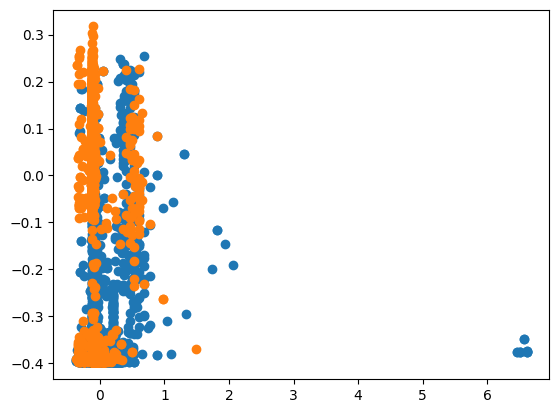

In [ ]:
plt.scatter(X[y_pred_corr,1],X[y_pred_corr,2])
plt.scatter(X[y_pred_incorr,1],X[y_pred_incorr,2])
plt.show()

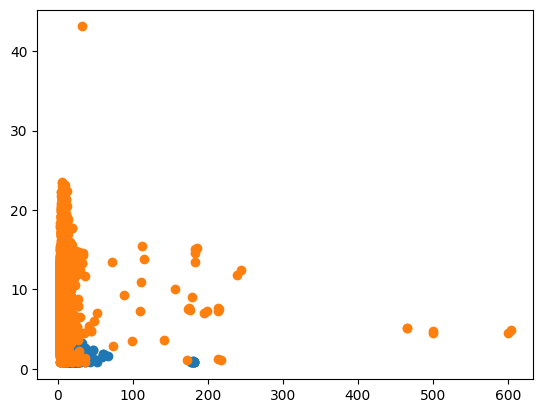

In [ ]:
df_dc_in=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
plt.scatter(df_dc_in.hor_acc,df_dc_in.ver_acc)
df_dc_o=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_o5.csv')
plt.scatter(df_dc_o.hor_acc,df_dc_o.ver_acc)


In [ ]:
pp[0]

array([   37,    39,    40, ..., 24726, 24744, 24773])

<StemContainer object of 3 artists>

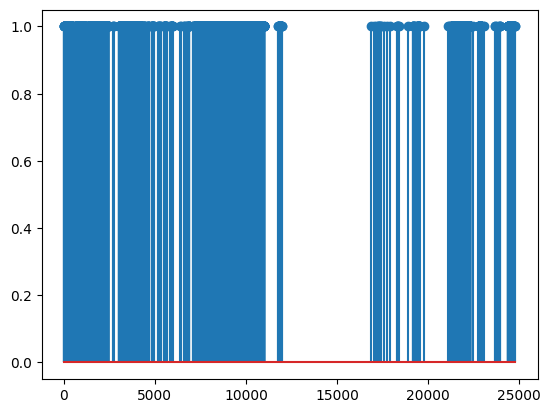

In [ ]:
plt.stem(pp[0],np.ones(len(pp[0])))

In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_inw5.csv';
class_label=2
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Indoor Near Window"
duration=6
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration)

42/42 [==============================] - 0s 3ms/step
DNN Test Accuracy for DC Indoor Near Window: 0.506051
DNN Test Accuracy for DC Indoor Near Window with MV method: 0.472727
DT Test Accuracy for DC Indoor Near Window: 0.690620
DT Test Accuracy for DC Indoor Near Window with MV method: 0.640909
RF Test Accuracy for DC Indoor Near Window: 0.341906
RF Test Accuracy for DC Indoor Near Window with MV method: 0.318182


In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_inw5.csv';
class_label=2
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Indoor Near Window"
duration=480
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration)

42/42 [==============================] - 0s 2ms/step
DNN Test Accuracy for DC Indoor Near Window: 0.506051
DNN Test Accuracy for DC Indoor Near Window with MV method: 1.000000
DT Test Accuracy for DC Indoor Near Window: 0.690620
DT Test Accuracy for DC Indoor Near Window with MV method: 1.000000
RF Test Accuracy for DC Indoor Near Window: 0.341906
RF Test Accuracy for DC Indoor Near Window with MV method: 0.500000


In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_o5.csv';
class_label=0
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="DC Outdoor"
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag)

185/185 [==============================] - 1s 3ms/step
DNN Test Accuracy for DC Outdoor: 0.993046
DNN Test Accuracy for DC Outdoor with MV method: 0.995927
DT Test Accuracy for DC Outdoor: 0.968623
DT Test Accuracy for DC Outdoor with MV method: 0.974542
RF Test Accuracy for DC Outdoor: 0.988976
RF Test Accuracy for DC Outdoor with MV method: 0.992872


## **ATLANTA DATASET**


In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech20_out.csv';
class_label=0
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="Gtech20_out"
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag)

1/1 [==============================] - 0s 24ms/step
DNN Test Accuracy for Gtech20_out: 0.857143
DNN Test Accuracy for Gtech20_out with MV method: 1.000000
DT Test Accuracy for Gtech20_out: 0.857143
DT Test Accuracy for Gtech20_out with MV method: 1.000000
RF Test Accuracy for Gtech20_out: 0.785714
RF Test Accuracy for Gtech20_out with MV method: 1.000000


In [ ]:
dir_file='/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech20_out5.csv';
class_label=0
scaler=train_scaler
dnn_mdl=test_model
dt_mdl=clf_tree
rf_mdl=clf_rf
tag="Gtech20_out"
three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag)

3/3 [==============================] - 0s 6ms/step
DNN Test Accuracy for Gtech20_out: 0.870588
DNN Test Accuracy for Gtech20_out with MV method: 0.928571
DT Test Accuracy for Gtech20_out: 0.929412
DT Test Accuracy for Gtech20_out with MV method: 1.000000
RF Test Accuracy for Gtech20_out: 0.800000
RF Test Accuracy for Gtech20_out with MV method: 0.785714


In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech20_out.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", 0*np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];

X_atl = train_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
y_pred=test_model.predict(X_atl)
y_pred=np.argmax(y_pred,axis=1)
print(f"Best Model's Test Accuracy for DNN indoors: {np.sum(np.where(y_pred==0,1,0))/len(y_pred):3f}")


y_predmv=y_pred[0:int(np.floor(len(y_pred)/6)*6)]
y_predmv=np.reshape(y_predmv,(-1,6))
y_predmv=np.transpose(y_predmv)
y_predmv=np.where(y_predmv==0,1,0)
y_predmv=np.sum(y_predmv,axis=0)/6
y_predmv=[np.where(y_predmv>=0.5,1,0)]
y_atl_mv=np.ones(int(len(y_predmv)))

print(f"Best Model's Test Accuracy for DNN indoors with MV method: {np.sum(np.where(y_predmv[0]==1,1,0))/len(y_predmv[0]):3f}")

y_pred_atl=clf_tree.predict(X_atl)

print(f"Decision Tree Test Accuracy for DC indoors data : {np.sum(np.where(y_pred_atl==0,1,0))/len(y_pred_atl):3f}")

y_predmv=y_pred_atl[0:int(np.floor(len(y_pred)/6)*6)]
y_predmv=np.reshape(y_predmv,(-1,6))
y_predmv=np.transpose(y_predmv)
y_predmv=np.where(y_predmv==0,1,0)
y_predmv=np.sum(y_predmv,axis=0)/6
y_predmv=[np.where(y_predmv>=0.5,1,0)]
y_atl_mv=np.ones(int(len(y_predmv)))

print(f"Best Model's Test Accuracy for DC indoors with MV method: {np.sum(np.where(y_predmv[0]==1,1,0))/len(y_predmv[0]):3f}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for RF indoors  data : {np.sum(np.where(y_pred_atl==0,1,0))/len(y_pred_atl):3f}")

y_predmv=y_pred_atl[0:int(np.floor(len(y_pred)/6)*6)]
y_predmv=np.reshape(y_predmv,(-1,6))
y_predmv=np.transpose(y_predmv)
y_predmv=np.where(y_predmv==0,1,0)
y_predmv=np.sum(y_predmv,axis=0)/6
y_predmv=[np.where(y_predmv>=0.5,1,0)]
y_atl_mv=np.ones(int(len(y_predmv)))

print(f"Best Model's Test Accuracy for RF indoors with MV method: {np.sum(np.where(y_predmv[0]==1,1,0))/len(y_predmv[0]):3f}")

14
1/1 [==============================] - 0s 41ms/step
Best Model's Test Accuracy for DNN indoors: 0.857143
Best Model's Test Accuracy for DNN indoors with MV method: 1.000000
Decision Tree Test Accuracy for DC indoors data : 0.857143
Best Model's Test Accuracy for DC indoors with MV method: 1.000000
Random Forest Test Accuracy for RF indoors  data : 0.785714
Best Model's Test Accuracy for RF indoors with MV method: 1.000000


In [ ]:
feature_importances = clf_tree.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

In [ ]:
sorted_indices

array([ 2, 10,  1,  4, 11, 15, 61, 19,  0, 60, 23, 64, 20, 21, 22, 18, 24,
       17, 67,  6, 26, 13, 14, 68,  9,  5, 66, 31, 71, 33, 25, 70,  3, 65,
       32, 62, 63, 69, 28, 30, 34, 27, 35, 16,  7,  8, 59, 58, 57, 56, 12,
       55, 54, 53, 42, 52, 29, 40, 39, 38, 37, 36, 43, 44, 51, 45, 46, 47,
       41, 49, 50, 48])

In [ ]:
colname = df_inw.columns[sorted_indices]
print (colname)

Index(['ver_acc', 'num_of_wifi_5', 'hor_acc', 'lte_num_of_f1', 'num_of_wifi_6',
       'lte_max_rssi_f2', 'avg_rssi_of_wifi_5', 'lte_avg_rsrp_f2',
       'sim_operator', 'avg_rssi_of_wifi_2_4', 'lte_min_rsrp_f2',
       'std_wifi_5_rssi', 'lte_max_rsrp_f1', 'lte_max_rsrp_f2',
       'lte_min_rsrp_f1', 'lte_avg_rsrp_f1', 'lte_avg_rsrq_f1',
       'lte_min_rssi_f2', 'min_of_wifi_2_4', 'num_of_nr_cell',
       'lte_max_rsrq_f1', 'lte_avg_rssi_f2', 'lte_max_rssi_f1',
       'max_of_wifi_5', 'num_of_wifi_2_4', 'lte_num_of_f2', 'max_of_wifi_2_4',
       'lte_std_rsrp_f1', 'min_of_wifi_6', 'lte_std_rssi_f2',
       'lte_avg_rsrq_f2', 'max_of_wifi_6', 'num_of_lte_cell',
       'std_wifi_6_rssi', 'lte_std_rsrq_f1', 'avg_rssi_of_wifi_6',
       'std_wifi_2_4_rssi', 'min_of_wifi_5', 'lte_min_rsrq_f1',
       'lte_std_rssi_f1', 'lte_std_rsrp_f2', 'lte_max_rsrq_f2',
       'lte_std_rsrq_f2', 'lte_min_rssi_f1', 'nr_num_of_f1', 'nr_num_of_f2',
       'nr_std_rsrq_f2', 'nr_std_rsrp_f2', 'nr_std_rssi_f

In [ ]:
feature_importances_rf = clf_rf.feature_importances_
sorted_indices_rf = feature_importances_rf.argsort()[::-1]

In [ ]:
sorted_indices_rf

array([ 2, 10,  1, 68, 61, 64, 11, 26, 63, 23, 20, 19, 71, 21, 17, 15, 13,
       22, 27, 24, 33, 18, 60, 25,  0, 29, 28, 66, 16, 62,  5, 65,  9,  4,
       34, 70,  3, 69, 67, 12, 35, 14, 32, 31, 30,  6, 50, 44, 46, 42,  7,
       43, 51, 49, 45, 48, 52,  8, 47, 53, 59, 54, 36, 37, 58, 57, 38, 39,
       40, 41, 56, 55])

In [ ]:
colname = df_inw.columns[sorted_indices_rf]
print (colname)

Index(['ver_acc', 'num_of_wifi_5', 'hor_acc', 'max_of_wifi_5',
       'avg_rssi_of_wifi_5', 'std_wifi_5_rssi', 'num_of_wifi_6',
       'lte_max_rsrq_f1', 'std_wifi_2_4_rssi', 'lte_min_rsrp_f2',
       'lte_max_rsrp_f1', 'lte_avg_rsrp_f2', 'min_of_wifi_6',
       'lte_max_rsrp_f2', 'lte_min_rssi_f2', 'lte_max_rssi_f2',
       'lte_avg_rssi_f2', 'lte_min_rsrp_f1', 'lte_max_rsrq_f2',
       'lte_avg_rsrq_f1', 'lte_std_rssi_f2', 'lte_avg_rsrp_f1',
       'avg_rssi_of_wifi_2_4', 'lte_avg_rsrq_f2', 'sim_operator',
       'lte_min_rsrq_f2', 'lte_min_rsrq_f1', 'max_of_wifi_2_4',
       'lte_min_rssi_f1', 'avg_rssi_of_wifi_6', 'lte_num_of_f2',
       'std_wifi_6_rssi', 'num_of_wifi_2_4', 'lte_num_of_f1',
       'lte_std_rsrp_f2', 'max_of_wifi_6', 'num_of_lte_cell', 'min_of_wifi_5',
       'min_of_wifi_2_4', 'lte_avg_rssi_f1', 'lte_std_rsrq_f2',
       'lte_max_rssi_f1', 'lte_std_rsrq_f1', 'lte_std_rsrp_f1',
       'lte_std_rssi_f1', 'num_of_nr_cell', 'nr_max_rsrq_f1', 'nr_max_rsrp_f1',
       '

In [ ]:
def CDF(data):
  data_sorted = np.sort(data)

  # Calculate the cumulative distribution values
  cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

  return[data_sorted,cdf]

In [ ]:
X,y_pred=three_classes(dir_file,class_label,scaler,dnn_mdl,dt_mdl,rf_mdl,tag,duration)

NameError: name 'three_classes' is not defined

In [ ]:
y_pred_corr=np.where(y_pred==1)
y_pred_incorr=np.where(y_pred!=1)

In [ ]:
df_inw

,hor_acc,ver_acc,num_of_wifi_5,max_of_wifi_5,classes
0,9.988000,5.106248,3,-77,2.0
1,10.255000,4.401061,11,-58,2.0
2,10.255000,4.401061,10,-61,2.0
3,10.255000,4.401061,11,-60,2.0
4,10.255000,4.401061,10,-60,2.0
...,...,...,...,...,...
20968,14.774000,1.004858,51,-51,2.0
20969,15.094000,0.855869,57,-50,2.0
20970,15.154000,0.853507,61,-50,2.0
20971,15.100000,0.858457,56,-50,2.0


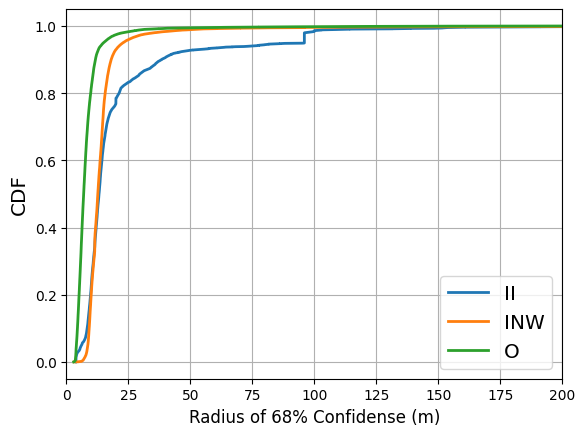

In [ ]:
idx=0
[a,b]=CDF(df_inw.hor_acc)
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_ii.hor_acc)
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_o.hor_acc)
plt.plot(a,b,linewidth=2)
plt.xlim([0,200])
plt.legend(['II','INW','O'],fontsize='x-large')
plt.xlabel("Radius of 68% Confidense (m)",fontsize='large')
plt.ylabel("CDF",fontsize='x-large')
plt.grid("True")

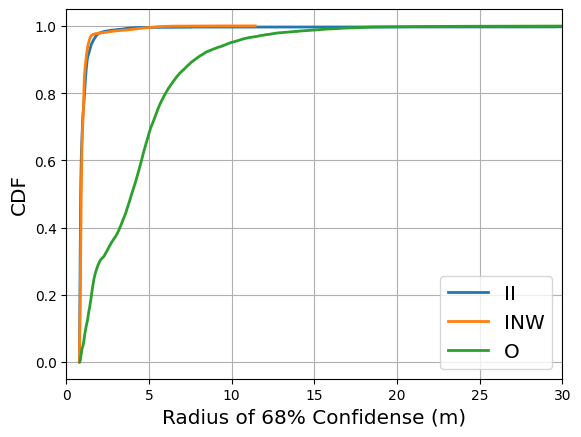

In [ ]:
idx=1
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_o.iloc[:,idx])
plt.plot(a,b,linewidth=2)
plt.xlim([0,30])
plt.legend(['II','INW','O'],fontsize='x-large')
plt.xlabel("Radius of 68% Confidense (m)",fontsize='x-large')
plt.ylabel("CDF",fontsize='x-large')
plt.grid("True")

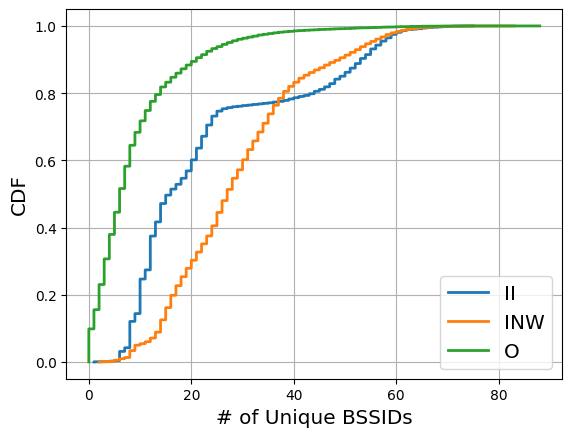

In [ ]:
idx=2
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_o.iloc[:,idx])
plt.plot(a,b,linewidth=2)
plt.legend(['II','INW','O'],fontsize='x-large')
plt.xlabel("# of Unique BSSIDs",fontsize='x-large')
plt.ylabel("CDF",fontsize='x-large')
plt.grid("True")

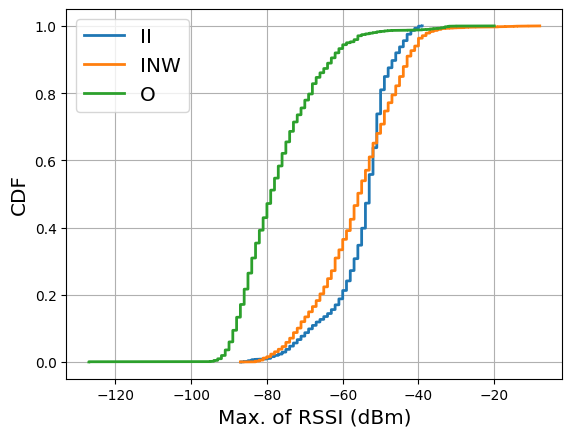

In [ ]:
idx=3
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b,linewidth=2)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b,linewidth=2)
df_oo=df_o
df_oo = df_oo.loc[df_oo['max_of_wifi_5'] < 0]
[a,b]=CDF(df_oo.iloc[:,idx])
plt.plot(a,b,linewidth=2)
#df_dc_in=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
#df_dc_in=df_dc_in.iloc[:,5:]
#[a,b]=CDF(df_dc_in.iloc[y_pred_incorr[0],idx])
#plt.plot(a,b)
plt.legend(['II','INW','O'],fontsize='x-large')
plt.xlabel("Max. of RSSI (dBm)",fontsize='x-large')
plt.ylabel("CDF",fontsize='x-large')
plt.grid("True")

In [ ]:
df_ii.columns

Index(['hor_acc', 'num_of_wifi_5', 'max_of_wifi_5', 'classes'], dtype='object')

In [ ]:
a.shape

(24179,)

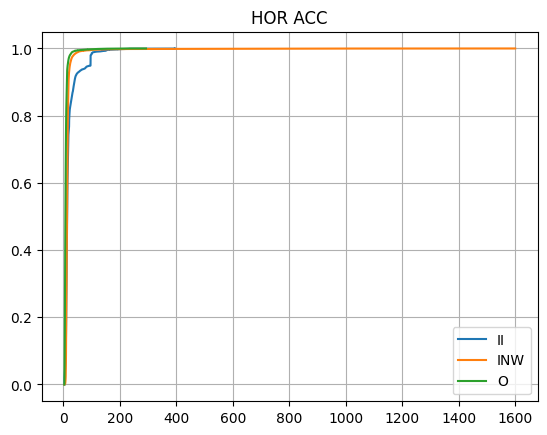

In [ ]:
idx=0
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_o.iloc[:,idx])
plt.plot(a,b)
#df_dc_in=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
#df_dc_in=df_dc_in.iloc[:,5:]
#[a,b]=CDF(df_dc_in.iloc[y_pred_incorr[0],idx])
#plt.plot(a,b)
plt.legend(['II','INW','O'])
plt.title("HOR ACC")
plt.grid("True")

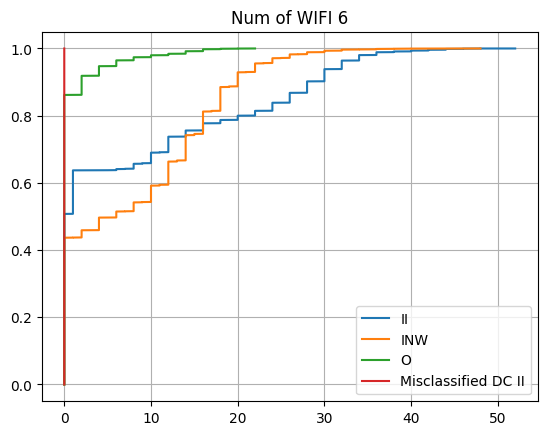

In [ ]:
idx=11
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_o.iloc[:,idx])
plt.plot(a,b)
df_dc_in=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
df_dc_in=df_dc_in.iloc[:,5:]
[a,b]=CDF(df_dc_in.iloc[y_pred_incorr[0],idx])
plt.plot(a,b)
plt.legend(['II','INW','O','Misclassified DC II'])
plt.title("Num of WIFI 6")
plt.grid("True")

# After Adding 30% of testing dataset

In [ ]:
df_dc = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
df_dc=df_dc.iloc[:,5:]
df_dc_train=df_dc.iloc[:int(np.floor(0.3*len(df_ii))),:]
[a,b]=df_dc_train.shape
df_dc_train.insert(b, "classes", np.ones(a), True)
df_dc_test=df_dc.iloc[int(np.floor(0.3*len(df_ii)))+1:,:]
[a,b]=df_dc_test.shape
df_dc_test.insert(b, "classes", np.ones(a), True)


In [ ]:
idx=11
[a,b]=CDF(df_inw.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_ii.iloc[:,idx])
plt.plot(a,b)
[a,b]=CDF(df_o.iloc[:,idx])
plt.plot(a,b)
df_dc_in=pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/dc_ii5.csv')
df_dc_in=df_dc_in.iloc[:,5:]
[a,b]=CDF(df_dc_in.iloc[y_pred_incorr[0],idx])
plt.plot(a,b)
plt.legend(['II','INW','O','Misclassified DC II'])
plt.title("NUM of WIFI 5")
plt.grid("True")

In [ ]:
df_ii_new=df_ii.iloc[:int(np.floor(0.7*len(df_ii))),:]

In [ ]:
res

,sim_operator,hor_acc,ver_acc,num_of_lte_cell,lte_num_of_f1,lte_num_of_f2,num_of_nr_cell,nr_num_of_f1,nr_num_of_f2,num_of_wifi_2_4,...,std_wifi_2_4_rssi,std_wifi_5_rssi,std_wifi_6_rssi,max_of_wifi_2_4,min_of_wifi_2_4,max_of_wifi_5,min_of_wifi_5,max_of_wifi_6,min_of_wifi_6,classes
0,0,25.037201,4.706333,1,0,1,0,0,0,13,...,-68.648288,-72.637310,0.000000,-63,-88.0,-68,-92.0,0,0.0,0.0
1,0,25.037201,4.706333,1,0,1,0,0,0,11,...,-65.254722,-72.064321,0.000000,-60,-89.0,-66,-91.0,0,0.0,0.0
2,0,25.037201,4.706333,1,0,1,0,0,0,11,...,-65.254722,-72.064321,0.000000,-60,-89.0,-66,-91.0,0,0.0,0.0
3,0,10.913000,3.124382,1,0,1,0,0,0,20,...,-68.565634,-77.125330,0.000000,-62,-89.0,-72,-92.0,0,0.0,0.0
4,0,10.913000,3.124382,1,0,1,0,0,0,10,...,-74.199990,-74.290570,0.000000,-69,-93.0,-70,-94.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20968,0,14.774000,1.004858,6,2,4,0,0,0,15,...,-59.963721,-58.079551,-62.993277,-54,-77.0,-51,-90.0,-57,-89.0,2.0
20969,0,15.094000,0.855869,6,2,4,0,0,0,6,...,-57.012538,-56.781265,-62.992168,-53,-82.0,-50,-91.0,-57,-89.0,2.0
20970,0,15.154000,0.853507,6,2,4,0,0,0,10,...,-58.065773,-56.920943,-62.718518,-53,-84.0,-50,-90.0,-57,-89.0,2.0
20971,0,15.100000,0.858457,6,2,4,0,0,0,11,...,-58.322844,-56.747266,-62.853267,-53,-83.0,-50,-90.0,-57,-88.0,2.0


In [ ]:
frames2=[df_o,df_ii_new,df_dc_train,df_inw]
res=pd.concat(frames2)
res_arr=res.to_numpy()
X=res_arr[:,0:b];
Y=res_arr[:,b];
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,shuffle=True)
train_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = train_scaler.transform(X_train)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

[s1,s2]=X_train.shape
[a,b]=y_train.shape
inp=tf.keras.Input(shape=(s2,))
inp2=tf.keras.layers.Dense(64,activation='relu')(inp)
inp2=tf.keras.layers.Dense(32,activation='relu')(inp)
inp2=tf.keras.layers.Dense(16,activation='relu')(inp2)
inp3=tf.keras.layers.Dense(8,activation='relu')(inp2)
out=tf.keras.layers.Dense(b,activation='softmax')(inp3)

mdl2=tf.keras.Model(inp,out)
print(mdl2.summary())

mdl2.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy']) # either loss or accuracy

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="DNN_3class_b.keras",
        save_best_only=False,
        monitor="val_acc"
    )
]

history = mdl2.fit(X_train,y_train,
                    epochs = 50, batch_size=128,
                    validation_split=0.25,
                    callbacks = callbacks)


[0. 0. 0. ... 2. 2. 2.]
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72)]              0         
                                                                 
 dense_6 (Dense)             (None, 32)                2336      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 3027 (11.82 KB)
Trainable params: 3027 (11.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
N

In [ ]:
Y

In [ ]:
test_model = tf.keras.models.load_model('DNN_3class_b.keras')
test_loss, test_acc = mdl2.evaluate(X_test,y_test)

print(f"Best Model's Test Accuracy: {test_acc:.3f}")


425/425 [==============================] - 1s 3ms/step - loss: 308.8760 - accuracy: 0.4767
Best Model's Test Accuracy: 0.477


In [ ]:
y_pred=mdl2.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

425/425 [==============================] - 1s 3ms/step


In [ ]:
np.unique(y_pred)

array([0., 1., 2.])

In [ ]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
clf_tree=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=10,min_samples_leaf=10)
clf_tree.fit(X_train, Y_train)
y_pred=clf_tree.predict(X_test)
print(f"Decision Tree Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")
clf_rf = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42,max_depth=10,min_samples_leaf=10)
clf_rf.fit(X_train, Y_train)
y_pred=clf_rf.predict(X_test)
print(f"Random Forest Test Accuracy : {np.mean(np.where(y_pred-Y_test==0,1,0))}")

Decision Tree Test Accuracy : 0.3353443201883461
Random Forest Test Accuracy : 0.303708063566804


In [ ]:
idx=np.where(Y_test==0)
X_test_o=np.squeeze(X_test[idx,:])
y_test_o=np.squeeze(y_test[idx,:])
Y_test_o=np.squeeze(Y_test[idx])
test_loss_o, test_acc_outdoor = test_model.evaluate(X_test_o,y_test_o)
print(f"Best Model's Test Accuracy for Outdoor: {test_acc_outdoor:.3f}")

idx=np.where(Y_test==1)
X_test_ii=np.squeeze(X_test[idx,:])
y_test_ii=np.squeeze(y_test[idx,:])
Y_test_ii=np.squeeze(Y_test[idx])
test_loss_ii, test_acc_ii = test_model.evaluate(X_test_ii,y_test_ii)
print(f"Best Model's Test Accuracy for Indoor Interior: {test_acc_ii:.3f}")

idx=np.where(Y_test==2)
X_test_inw=np.squeeze(X_test[idx,:])
y_test_inw=np.squeeze(y_test[idx,:])
Y_test_inw=np.squeeze(Y_test[idx])
test_loss_inw, test_acc_inw = test_model.evaluate(X_test_inw,y_test_inw)
print(f"Best Model's Test Accuracy for Indoor Near Window: {test_acc_inw:.3f}")

152/152 [==============================] - 1s 2ms/step - loss: 263.4409 - accuracy: 0.6911
Best Model's Test Accuracy for Outdoor: 0.691
143/143 [==============================] - 0s 1ms/step - loss: 134.4034 - accuracy: 0.5540
Best Model's Test Accuracy for Indoor Interior: 0.554
132/132 [==============================] - 0s 2ms/step - loss: 550.9484 - accuracy: 0.1454
Best Model's Test Accuracy for Indoor Near Window: 0.145


In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech20_a.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
atl_scaler = preprocessing.StandardScaler().fit(X_atl)
X_atl = atl_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"Best Model's Test Accuracy for ATLANTA Gtech20 windows indoor data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for ATLANTA Gtech20 windows indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for ATLANTA Gtech20 windows indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech20_b.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
atl_scaler = preprocessing.StandardScaler().fit(X_atl)
X_atl = atl_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"Best Model's Test Accuracy for ATLANTA Gtech20 near-window indoor data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for ATLANTA Gtech20 near-window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for ATLANTA Gtech20 near-window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech9_a.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
atl_scaler = preprocessing.StandardScaler().fit(X_atl)
X_atl = atl_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"Best Model's Test Accuracy for ATLANTA Gtech9 near-window indoor data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for ATLANTA Gtech9 near-window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for ATLANTA Gtech9 near-window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

In [ ]:
df_atl_in = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/Gtech9_b.csv')
df_atl_in=df_atl_in.iloc[:, 5:]
[a,b]=df_atl_in.shape
print(a)
df_atl_in.insert(b, "classes", np.ones(a), True)


frames3=[df_atl_in]
df_atl=pd.concat(frames3)

res_atl=df_atl.to_numpy()
X_atl=res_atl[:,:b];
Y_atl=res_atl[:,b];
atl_scaler = preprocessing.StandardScaler().fit(X_atl)
X_atl = atl_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"Best Model's Test Accuracy for ATLANTA Gtech9 window indoor data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for ATLANTA Gtech9 window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for ATLANTA Gtech9 window indoor data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

In [ ]:
atl_scaler = preprocessing.StandardScaler().fit(X_atl)
X_atl = atl_scaler.transform(X_atl)
y_atl = to_categorical(Y_atl)

In [ ]:
atl_loss, atl_acc = test_model.evaluate(X_atl,y_atl)
print(f"Best Model's Test Accuracy for ATLANTA data: {atl_acc:.3f}")
y_pred_atl=clf_tree.predict(X_atl)
print(f"Decision Tree Test Accuracy for ATALANTA data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

y_pred_atl=clf_rf.predict(X_atl)
print(f"Random Forest Test Accuracy for ATALANTA data : {1-np.mean(np.abs(y_pred_atl-Y_atl))}")

# Data Analysis

In [ ]:
df_ii = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/ii5.csv')
df_inw = pd.read_csv('/content/drive/Shareddrives/Indoor_Outdoor_Classification_Paper/inw5.csv')
frame_in=[df_ii,df_inw]
df_i=pd.concat(frame_in)

In [ ]:
df_i

In [ ]:
def weighted_mean_db(w1,v1,w2,v2):
  v1_lin=10**(v1/10)
  v2_lin=10**(v2/10)
  temp=10*np.log10((w1*v1_lin+w2*v2_lin)/(w1+w2))
  return temp.replace('NaN',0)


In [ ]:
# Indoors


LTE_NUM_II_f1=df_ii.lte_num_of_f1
LTE_NUM_II_f2=df_ii.lte_num_of_f2
LTE_RSRP_Count_II=LTE_NUM_II_f1+LTE_NUM_II_f2
LTE_RSRP_AVG_II=weighted_mean_db(LTE_NUM_II_f1,df_ii.lte_avg_rsrp_f1,LTE_NUM_II_f2,df_ii.lte_avg_rsrp_f2)
LTE_RSRP_Max_II=df_ii[['lte_max_rsrp_f1','lte_max_rsrp_f2']].max(axis=1)
LTE_RSRP_Min_II=df_ii[['lte_min_rsrp_f1','lte_min_rsrp_f2']].min(axis=1)


LTE_RSSI_Count_II=LTE_NUM_II_f1+LTE_NUM_II_f2
LTE_RSSI_AVG_II=weighted_mean_db(LTE_NUM_II_f1,df_ii.lte_avg_rssi_f1,LTE_NUM_II_f2,df_ii.lte_avg_rssi_f2)
LTE_RSSI_Max_II=df_ii[['lte_max_rssi_f1','lte_max_rssi_f2']].max(axis=1)
LTE_RSSI_Min_II=df_ii[['lte_min_rssi_f1','lte_min_rssi_f2']].min(axis=1)

LTE_RSRQ_Count_II=LTE_NUM_II_f1+LTE_NUM_II_f2
LTE_RSRQ_AVG_II=weighted_mean_db(LTE_NUM_II_f1,df_ii.lte_avg_rsrq_f1,LTE_NUM_II_f2,df_ii.lte_avg_rsrq_f2)
LTE_RSRQ_Max_II=df_ii[['lte_max_rsrq_f1','lte_max_rsrq_f2']].max(axis=1)
LTE_RSRQ_Min_II=df_ii[['lte_min_rsrq_f1','lte_min_rsrq_f2']].min(axis=1)


# Indoor NearWindow

LTE_NUM_INW_f1=df_inw.lte_num_of_f1
LTE_NUM_INW_f2=df_inw.lte_num_of_f2
LTE_RSRP_Count_INW=LTE_NUM_INW_f1+LTE_NUM_INW_f2
LTE_RSRP_AVG_INW=weighted_mean_db(LTE_NUM_INW_f1,df_inw.lte_avg_rsrp_f1,LTE_NUM_INW_f2,df_inw.lte_avg_rsrp_f2)
LTE_RSRP_Max_INW=df_inw[['lte_max_rsrp_f1','lte_max_rsrp_f2']].max(axis=1)
LTE_RSRP_Min_INW=df_inw[['lte_min_rsrp_f1','lte_min_rsrp_f2']].min(axis=1)

LTE_RSSI_Count_INW=LTE_NUM_INW_f1+LTE_NUM_INW_f2
LTE_RSSI_AVG_INW=weighted_mean_db(LTE_NUM_INW_f1,df_inw.lte_avg_rssi_f1,LTE_NUM_INW_f2,df_inw.lte_avg_rssi_f2)
LTE_RSSI_Max_INW=df_inw[['lte_max_rssi_f1','lte_max_rssi_f2']].max(axis=1)
LTE_RSSI_Min_INW=df_inw[['lte_min_rssi_f1','lte_min_rssi_f2']].min(axis=1)

LTE_RSRQ_Count_INW=LTE_NUM_INW_f1+LTE_NUM_INW_f2
LTE_RSRQ_AVG_INW=weighted_mean_db(LTE_NUM_INW_f1,df_inw.lte_avg_rsrq_f1,LTE_NUM_INW_f2,df_inw.lte_avg_rsrq_f2)
LTE_RSRQ_Max_INW=df_inw[['lte_max_rsrq_f1','lte_max_rsrq_f2']].max(axis=1)
LTE_RSRQ_Min_INW=df_inw[['lte_min_rsrq_f1','lte_min_rsrq_f2']].min(axis=1)




# Outdoors

LTE_NUM_O_f1=df_o.lte_num_of_f1
LTE_NUM_O_f2=df_o.lte_num_of_f2
LTE_RSRP_Count_O=LTE_NUM_O_f1+LTE_NUM_O_f2
LTE_RSRP_AVG_O=weighted_mean_db(LTE_NUM_O_f1,df_o.lte_avg_rsrp_f1,LTE_NUM_O_f2,df_o.lte_avg_rsrp_f2)
LTE_RSRP_Max_O=df_o[['lte_max_rsrp_f1','lte_max_rsrp_f2']].max(axis=1)
LTE_RSRP_Min_O=df_o[['lte_min_rsrp_f1','lte_min_rsrp_f2']].min(axis=1)


LTE_RSSI_Count_O=LTE_NUM_O_f1+LTE_NUM_O_f2
LTE_RSSI_AVG_O=weighted_mean_db(LTE_NUM_O_f1,df_o.lte_avg_rssi_f1,LTE_NUM_O_f2,df_o.lte_avg_rssi_f2)
LTE_RSSI_Max_O=df_o[['lte_max_rssi_f1','lte_max_rssi_f2']].max(axis=1)
LTE_RSSI_Min_O=df_o[['lte_min_rssi_f1','lte_min_rssi_f2']].min(axis=1)

LTE_RSRQ_Count_O=LTE_NUM_O_f1+LTE_NUM_O_f2
LTE_RSRQ_AVG_O=weighted_mean_db(LTE_NUM_O_f1,df_o.lte_avg_rsrq_f1,LTE_NUM_O_f2,df_o.lte_avg_rsrq_f2)
LTE_RSRQ_Max_O=df_o[['lte_max_rsrq_f1','lte_max_rsrq_f2']].max(axis=1)
LTE_RSRQ_Min_O=df_o[['lte_min_rsrq_f1','lte_min_rsrq_f2']].min(axis=1)

(-30.0, 0.0)

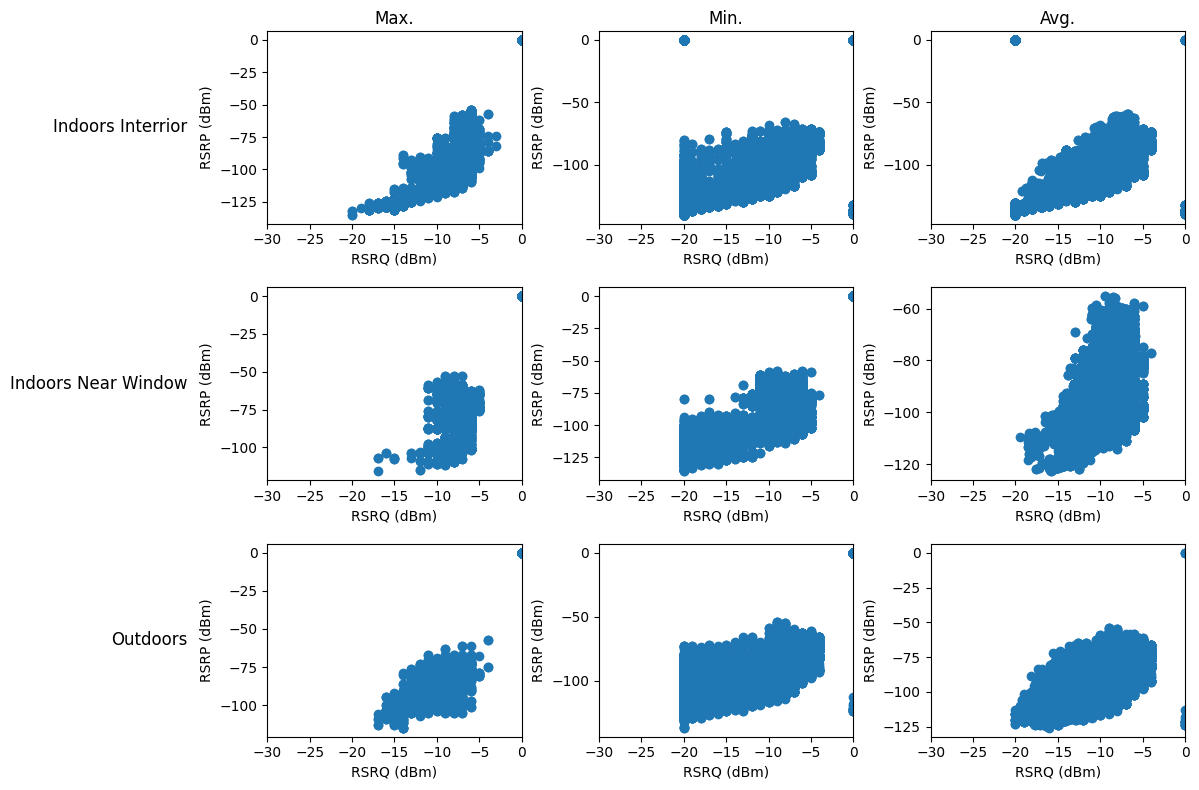

In [ ]:
cols = ['{}'.format(col) for col in ['Max.', 'Min.', 'Avg.']]
rows = ['{}'.format(row) for row in ['Indoors Interrior',"Indoors Near Window", 'Outdoors']]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
plt.setp(axes.flat, xlabel='RSRQ (dBm)', ylabel='RSRP (dBm)')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need
# to make some room. These numbers are are manually tweaked.
# You could automatically calculate them, but it's a pain.

# Indoors

axes[0,0].scatter(LTE_RSRQ_Max_II,LTE_RSRP_Max_II)
axes[0,0].set_xlim((-30,0))

axes[1,0].scatter(LTE_RSRQ_Max_INW,LTE_RSRP_Max_INW)
axes[1,0].set_xlim((-30,0))

axes[2,0].scatter(LTE_RSRQ_Max_O,LTE_RSRP_Max_O)
axes[2,0].set_xlim((-30,0))

axes[0,1].scatter(LTE_RSRQ_Min_II,LTE_RSRP_Min_II)
axes[0,1].set_xlim((-30,0))

axes[1,1].scatter(LTE_RSRQ_Min_INW,LTE_RSRP_Min_INW)
axes[1,1].set_xlim((-30,0))

axes[2,1].scatter(LTE_RSRQ_Min_O,LTE_RSRP_Min_O)
axes[2,1].set_xlim((-30,0))

axes[0,2].scatter(LTE_RSRQ_AVG_II,LTE_RSRP_AVG_II)
axes[0,2].set_xlim((-30,0))

axes[1,2].scatter(LTE_RSRQ_AVG_INW,LTE_RSRP_AVG_INW)
axes[1,2].set_xlim((-30,0))

axes[2,2].scatter(LTE_RSRQ_AVG_O,LTE_RSRP_AVG_O)
axes[2,2].set_xlim((-30,0))


In [ ]:
# Indoors

NR_NUM_II_f1=df_ii.nr_num_of_f1
NR_NUM_II_f2=df_ii.nr_num_of_f2
NR_RSRP_Count_II=NR_NUM_II_f1+NR_NUM_II_f2
NR_RSRP_AVG_II=weighted_mean_db(NR_NUM_II_f1,df_ii.nr_avg_rsrp_f1,NR_NUM_II_f2,df_ii.nr_avg_rsrp_f2)
NR_RSRP_Max_II=df_ii[['nr_max_rsrp_f1','nr_max_rsrp_f2']].max(axis=1)
NR_RSRP_Min_II=df_ii[['nr_min_rsrp_f1','nr_min_rsrp_f2']].min(axis=1)

NR_RSSI_Count_II=NR_NUM_II_f1+NR_NUM_II_f2
NR_RSSI_AVG_II=weighted_mean_db(NR_NUM_II_f1,df_ii.nr_avg_rssi_f1,NR_NUM_II_f2,df_ii.nr_avg_rssi_f2)
NR_RSSI_Max_II=df_ii[['nr_max_rssi_f1','nr_max_rssi_f2']].max(axis=1)
NR_RSSI_Min_II=df_ii[['nr_min_rssi_f1','nr_min_rssi_f2']].min(axis=1)

NR_RSRQ_Count_II=NR_NUM_II_f1+NR_NUM_II_f2
NR_RSRQ_AVG_II=weighted_mean_db(NR_NUM_II_f1,df_ii.nr_avg_rsrq_f1,NR_NUM_II_f2,df_ii.nr_avg_rsrq_f2)
NR_RSRQ_Max_II=df_ii[['nr_max_rsrq_f1','nr_max_rsrq_f2']].max(axis=1)
NR_RSRQ_Min_II=df_ii[['nr_min_rsrq_f1','nr_min_rsrq_f2']].min(axis=1)


# Indoors NW

NR_NUM_INW_f1=df_inw.nr_num_of_f1
NR_NUM_INW_f2=df_inw.nr_num_of_f2
NR_RSRP_Count_INW=NR_NUM_INW_f1+NR_NUM_INW_f2
NR_RSRP_AVG_INW=weighted_mean_db(NR_NUM_INW_f1,df_inw.nr_avg_rsrp_f1,NR_NUM_INW_f2,df_inw.nr_avg_rsrp_f2)
NR_RSRP_Max_INW=df_inw[['nr_max_rsrp_f1','nr_max_rsrp_f2']].max(axis=1)
NR_RSRP_Min_INW=df_inw[['nr_min_rsrp_f1','nr_min_rsrp_f2']].min(axis=1)

NR_RSSI_Count_INW=NR_NUM_INW_f1+NR_NUM_INW_f2
NR_RSSI_AVG_INW=weighted_mean_db(NR_NUM_INW_f1,df_inw.nr_avg_rssi_f1,NR_NUM_INW_f2,df_inw.nr_avg_rssi_f2)
NR_RSSI_Max_INW=df_inw[['nr_max_rssi_f1','nr_max_rssi_f2']].max(axis=1)
NR_RSSI_Min_INW=df_inw[['nr_min_rssi_f1','nr_min_rssi_f2']].min(axis=1)

NR_RSRQ_Count_INW=NR_NUM_INW_f1+NR_NUM_INW_f2
NR_RSRQ_AVG_INW=weighted_mean_db(NR_NUM_INW_f1,df_inw.nr_avg_rsrq_f1,NR_NUM_INW_f2,df_inw.nr_avg_rsrq_f2)
NR_RSRQ_Max_INW=df_inw[['nr_max_rsrq_f1','nr_max_rsrq_f2']].max(axis=1)
NR_RSRQ_Min_INW=df_inw[['nr_min_rsrq_f1','nr_min_rsrq_f2']].min(axis=1)



# Outdoors

NR_NUM_O_f1=df_o.nr_num_of_f1
NR_NUM_O_f2=df_o.nr_num_of_f2
NR_RSRP_Count_O=NR_NUM_O_f1+NR_NUM_O_f2
NR_RSRP_AVG_O=weighted_mean_db(NR_NUM_O_f1,df_o.nr_avg_rsrp_f1,NR_NUM_O_f2,df_o.nr_avg_rsrp_f2)
NR_RSRP_Max_O=df_o[['nr_max_rsrp_f1','nr_max_rsrp_f2']].max(axis=1)
NR_RSRP_Min_O=df_o[['nr_min_rsrp_f1','nr_min_rsrp_f2']].min(axis=1)

NR_RSSI_Count_O=NR_NUM_O_f1+NR_NUM_O_f2
NR_RSSI_AVG_O=weighted_mean_db(NR_NUM_O_f1,df_o.nr_avg_rssi_f1,NR_NUM_O_f2,df_o.nr_avg_rssi_f2)
NR_RSSI_Max_O=df_o[['nr_max_rssi_f1','nr_max_rssi_f2']].max(axis=1)
NR_RSSI_Min_O=df_o[['nr_min_rssi_f1','nr_min_rssi_f2']].min(axis=1)

NR_RSRQ_Count_O=NR_NUM_O_f1+NR_NUM_O_f2
NR_RSRQ_AVG_O=weighted_mean_db(NR_NUM_O_f1,df_o.nr_avg_rsrq_f1,NR_NUM_O_f2,df_o.nr_avg_rsrq_f2)
NR_RSRQ_Max_O=df_o[['nr_max_rsrq_f1','nr_max_rsrq_f2']].max(axis=1)
NR_RSRQ_Min_O=df_o[['nr_min_rsrq_f1','nr_min_rsrq_f2']].min(axis=1)



(-30.0, 0.0)

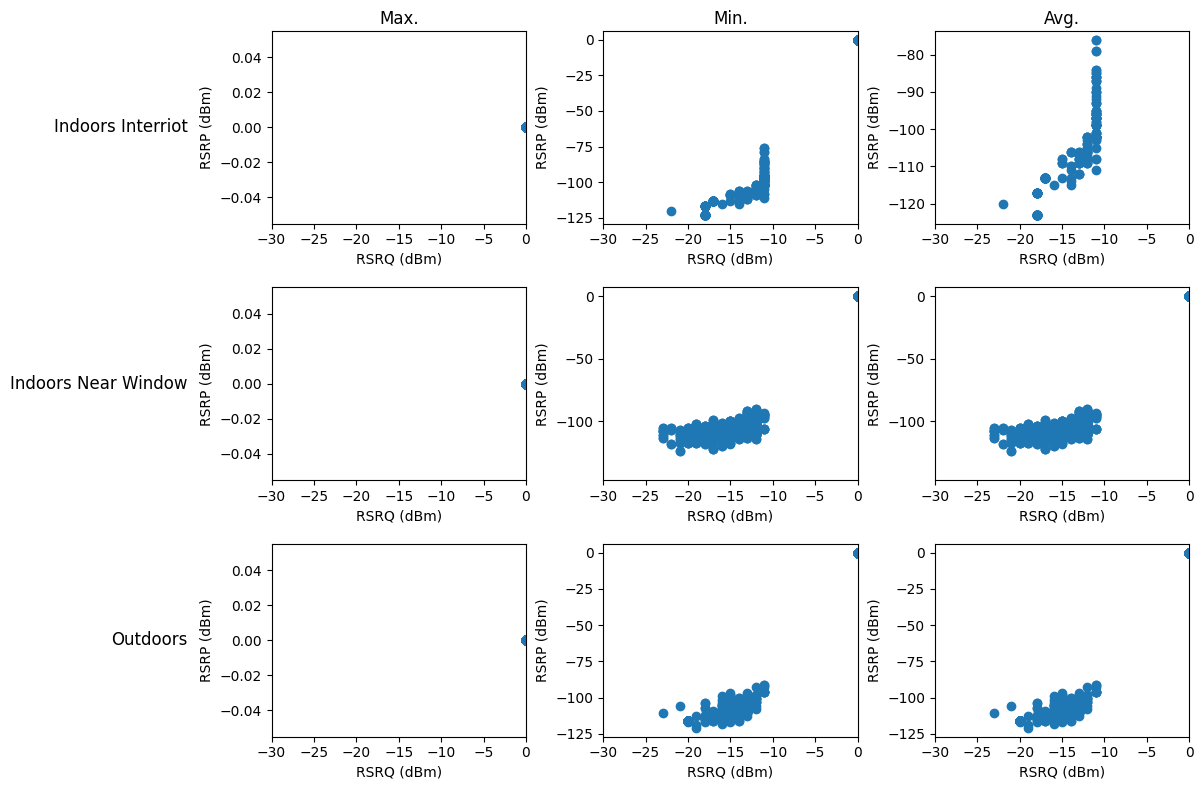

In [ ]:
cols = ['{}'.format(col) for col in ['Max.', 'Min.', 'Avg.']]
rows = ['{}'.format(row) for row in ['Indoors Interriot','Indoors Near Window', 'Outdoors']]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
plt.setp(axes.flat, xlabel='RSRQ (dBm)', ylabel='RSRP (dBm)')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need
# to make some room. These numbers are are manually tweaked.
# You could automatically calculate them, but it's a pain.

axes[0,0].scatter(NR_RSRQ_Max_II,NR_RSRP_Max_II)
axes[0,0].set_xlim((-30,0))

axes[1,0].scatter(NR_RSRQ_Max_INW,NR_RSRP_Max_INW)
axes[1,0].set_xlim((-30,0))

axes[2,0].scatter(NR_RSRQ_Max_O,NR_RSRP_Max_O)
axes[2,0].set_xlim((-30,0))

axes[0,1].scatter(NR_RSRQ_Min_II,NR_RSRP_Min_II)
axes[0,1].set_xlim((-30,0))

axes[1,1].scatter(NR_RSRQ_Min_INW,NR_RSRP_Min_INW)
axes[1,1].set_xlim((-30,0))

axes[2,1].scatter(NR_RSRQ_Min_O,NR_RSRP_Min_O)
axes[2,1].set_xlim((-30,0))

axes[0,2].scatter(NR_RSRQ_AVG_II,NR_RSRP_AVG_II)
axes[0,2].set_xlim((-30,0))

axes[1,2].scatter(NR_RSRQ_AVG_INW,NR_RSRP_AVG_INW)
axes[1,2].set_xlim((-30,0))

axes[2,2].scatter(NR_RSRQ_AVG_O,NR_RSRP_AVG_O)
axes[2,2].set_xlim((-30,0))






Bot plox


In [ ]:
Out_count_lte_f1=df_o.lte_num_of_f1
II_count_lte_f1=df_ii.lte_num_of_f1
INW_count_lte_f1=df_inw.lte_num_of_f1

Out_count_lte_f2=df_o.lte_num_of_f2
II_count_lte_f2=df_ii.lte_num_of_f2
INW_count_lte_f2=df_inw.lte_num_of_f2

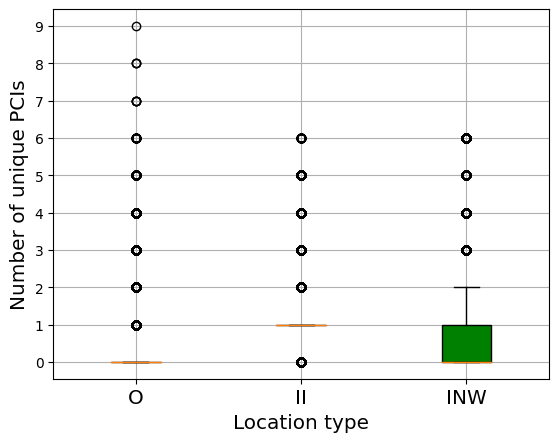

In [ ]:
# Combine the data into a list
data = [Out_count_lte_f1, II_count_lte_f1, INW_count_lte_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'],fontsize='x-large')

# Adding labels and title

plt.ylabel('Number of unique PCIs',fontsize='x-large')
plt.grid('true')
plt.xlabel('Location type',fontsize='x-large')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# Show the plot
plt.show()

In [ ]:
np.unique(INW_count_lte_f2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

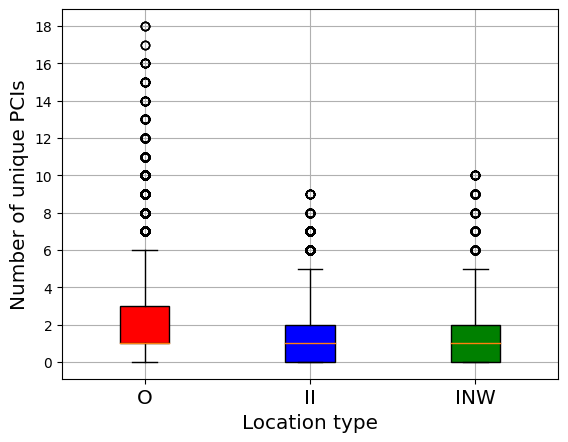

In [ ]:
# Combine the data into a list
data = [Out_count_lte_f2, II_count_lte_f2, INW_count_lte_f2]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'],fontsize='x-large')

# Adding labels and title

plt.ylabel('Number of unique PCIs',fontsize='x-large')
plt.xlabel('Location type',fontsize='x-large')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid('true')
# Show the plot
plt.show()

In [ ]:
np.unique(INW_count_lte_f1)

array([0, 1, 2, 3, 4, 5, 6])

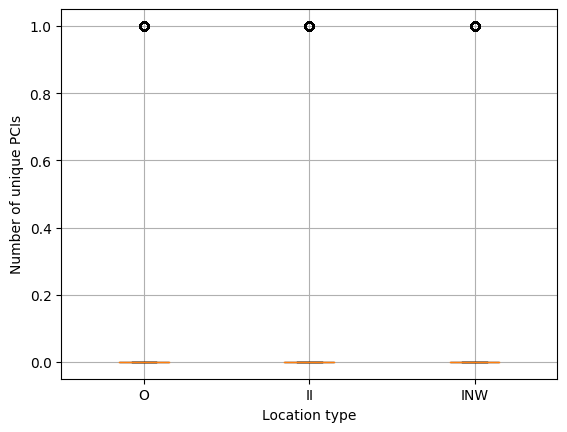

In [ ]:
# Combine the data into a list
data = [Out_count_nr_f1, II_count_nr_f1, INW_count_nr_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Number of unique PCIs')
plt.grid('true')
plt.xlabel('Location type')

# Show the plot
plt.show()

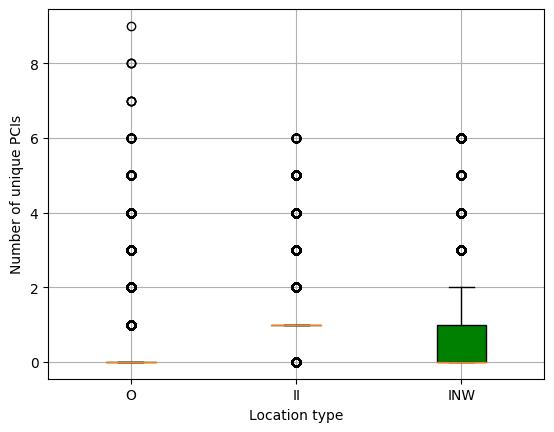

In [ ]:
# Combine the data into a list
data = [Out_count_lte_f1, II_count_lte_f1, INW_count_lte_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Number of unique PCIs')
plt.grid('true')
plt.xlabel('Location type')
plt.xlabel('Location type')

# Show the plot
plt.show()

In [ ]:
Out_count_nr_f1=df_o.nr_num_of_f1
II_count_nr_f1=df_ii.nr_num_of_f1
INW_count_nr_f1=df_inw.nr_num_of_f1

Out_count_nr_f2=df_o.nr_num_of_f2
II_count_nr_f2=df_ii.nr_num_of_f2
INW_count_nr_f2=df_inw.nr_num_of_f2

In [ ]:
Out_max_lte_f1 = df_o.lte_max_rsrp_f1
II_max_lte_f1 = df_ii.lte_max_rsrp_f1
INW_max_lte_f1 = df_inw.lte_max_rsrp_f1

Out_max_lte_f2 = df_o.lte_max_rsrp_f1
II_max_lte_f2 = df_ii.lte_max_rsrp_f2
INW_max_lte_f2 = df_inw.lte_max_rsrp_f2

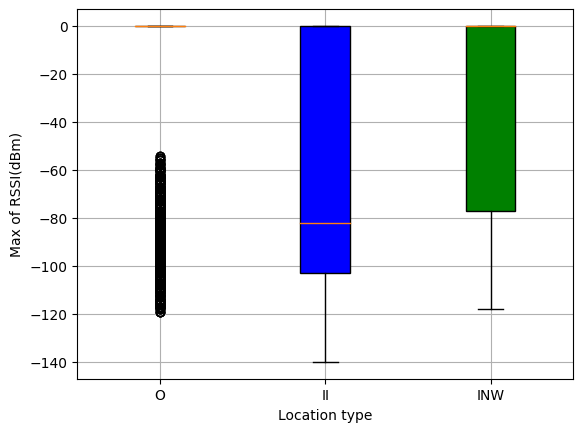

In [ ]:
# Combine the data into a list
data = [Out_max_lte_f1, II_max_lte_f1, INW_max_lte_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Max of RSSI(dBm)')
plt.grid('true')

plt.xlabel('Location type')
# Show the plot
plt.show()

In [ ]:
Out_min_lte_f1 = df_o['lte_min_rsrp_f1']
II_min_lte_f1 = df_ii['lte_min_rsrp_f1']
INW_min_lte_f1 = df_inw['lte_min_rsrp_f1']

Out_min_lte_f2 = df_o['lte_min_rsrp_f2']  # Corrected to f2 for consistency
II_min_lte_f2 = df_ii['lte_min_rsrp_f2']
INW_min_lte_f2 = df_inw['lte_min_rsrp_f2']

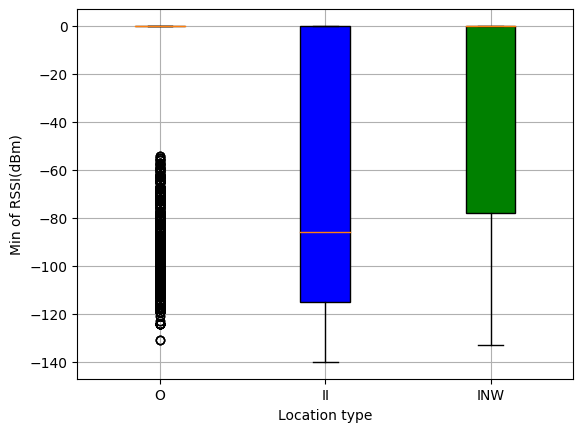

In [ ]:
# Combine the data into a list
data = [Out_min_lte_f1, II_min_lte_f1, INW_min_lte_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Min of RSSI(dBm)')
plt.grid('true')

plt.xlabel('Location type')
# Show the plot
plt.show()

In [ ]:
# Filter out non-negative values for LTE average RSRP for f1
Out_avg_lte_f1 = df_o[df_o['lte_avg_rsrp_f1'] < 0]['lte_avg_rsrp_f1']
II_avg_lte_f1 = df_ii[df_ii['lte_avg_rsrp_f1'] < 0]['lte_avg_rsrp_f1']
INW_avg_lte_f1 = df_inw[df_inw['lte_avg_rsrp_f1'] < 0]['lte_avg_rsrp_f1']

# Filter out non-negative values for LTE average RSRP for f2
Out_avg_lte_f2 = df_o[df_o['lte_avg_rsrp_f2'] < 0]['lte_avg_rsrp_f2']
II_avg_lte_f2 = df_ii[df_ii['lte_avg_rsrp_f2'] < 0]['lte_avg_rsrp_f2']
INW_avg_lte_f2 = df_inw[df_inw['lte_avg_rsrp_f2'] < 0]['lte_avg_rsrp_f2']

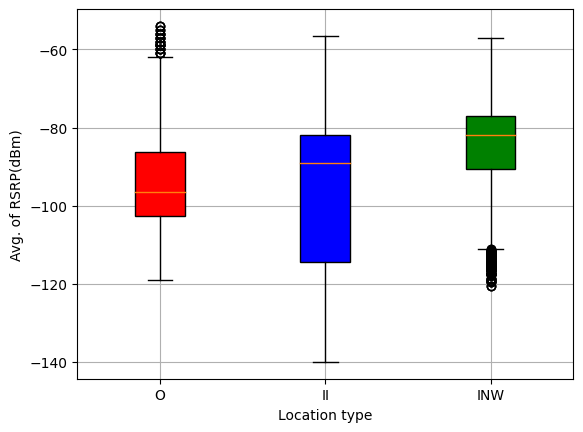

In [ ]:
# Combine the data into a list
data = [Out_avg_lte_f1, II_avg_lte_f1, INW_avg_lte_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Avg. of RSRP(dBm)')
plt.grid('true')
plt.xlabel('Location type')

# Show the plot
plt.show()

In [ ]:
# Filter out non-negative values for NR average RSRP for f1
Out_avg_nr_f1 = df_o[df_o['nr_avg_rsrp_f1'] < 0]['nr_avg_rsrp_f1']
II_avg_nr_f1 = df_ii[df_ii['nr_avg_rsrp_f1'] < 0]['nr_avg_rsrp_f1']
INW_avg_nr_f1 = df_inw[df_inw['nr_avg_rsrp_f1'] < 0]['nr_avg_rsrp_f1']

# Filter out non-negative values for NR average RSRP for f2
Out_avg_nr_f2 = df_o[df_o['nr_avg_rsrp_f2'] < 0]['nr_avg_rsrp_f2']
II_avg_nr_f2 = df_ii[df_ii['nr_avg_rsrp_f2'] < 0]['nr_avg_rsrp_f2']
INW_avg_nr_f2 = df_inw[df_inw['nr_avg_rsrp_f2'] < 0]['nr_avg_rsrp_f2']

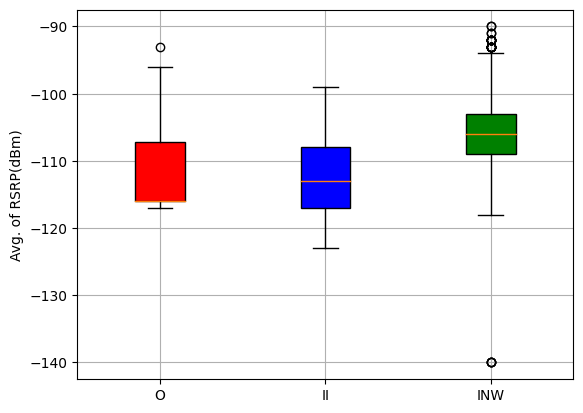

In [ ]:
# Combine the data into a list
data = [Out_avg_nr_f1, II_avg_nr_f1, INW_avg_nr_f1]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Avg. of RSRP(dBm)')
plt.grid('true')


# Show the plot
plt.show()

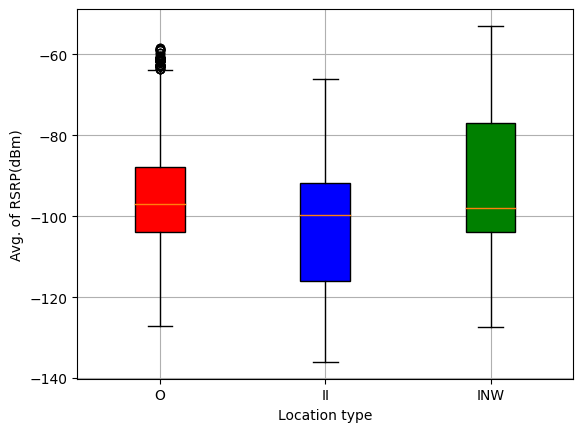

In [ ]:
# Combine the data into a list
data = [Out_avg_lte_f2, II_avg_lte_f2, INW_avg_lte_f2]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Avg. of RSRP(dBm)')
plt.grid('true')
plt.xlabel('Location type')

# Show the plot
plt.show()

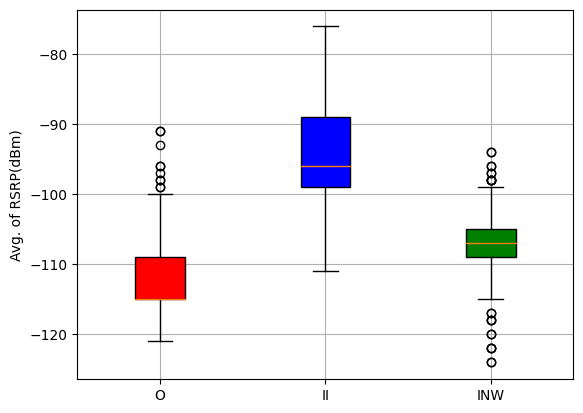

In [ ]:
# Combine the data into a list
data = [Out_avg_nr_f2, II_avg_nr_f2, INW_avg_nr_f2]

# Colors for the boxplots
colors = ['red', 'blue', 'green']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create the boxplot with color customization
bp = ax.boxplot(data, patch_artist=True)  # patch_artist must be True to fill with color

# Coloring each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-tick labels
ax.set_xticklabels(['O', 'II', 'INW'])

# Adding labels and title

plt.ylabel('Avg. of RSRP(dBm)')
plt.grid('true')


# Show the plot
plt.show()

In [ ]:
np.unique(df_ii.nr_max_rssi_f2)

array([0])